## **Import Libraries**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the csv file**

In [45]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## **Understanding the Data**

In [46]:
df.shape

(4269, 13)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [48]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## **Checking for imbalance in the data**

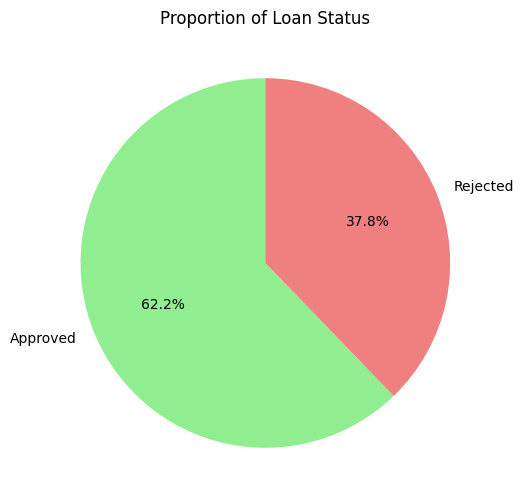

In [49]:
import matplotlib.pyplot as plt

loan_counts = df[' loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))  # specifies the figure size
plt.pie(loan_counts, labels=['Approved', 'Rejected'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Proportion of Loan Status')

# Display the plot
plt.show()

In [50]:
df[' loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


## **Data preprocessing**

In [51]:
# Calculate Monthly Gross Income
df['monthly_gross_income'] = df[" income_annum"] / 12

# Calculate Monthly Debt Payments
df['monthly_debt_payments'] = df[" loan_amount"] / (df[" loan_term"] * 12)

# Calculate Debt-to-Income Ratio
df['dti_ratio'] = df['monthly_debt_payments'] / df['monthly_gross_income']

In [52]:
# Calculate Total Value of Assets
df['total_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value'] + df[' luxury_assets_value'] + df[' bank_asset_value']

# Calculate Asset-to-Loan Ratio
df['asset_to_loan_ratio'] = df['total_assets'] / df[' loan_amount']

In [53]:
# Calculate Net Worth
df['net_worth'] = df['total_assets'] - df[' loan_amount']

In [54]:
from sklearn.preprocessing import LabelEncoder # to encode categorical column to numerical values
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [55]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_gross_income,monthly_debt_payments,dti_ratio,total_assets,asset_to_loan_ratio,net_worth
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,800000.000000,207638.888889,0.259549,50700000,1.695652,20800000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,341666.666667,127083.333333,0.371951,17000000,1.393443,4800000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,758333.333333,123750.000000,0.163187,57700000,1.942761,28000000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,683333.333333,319791.666667,0.467988,52700000,1.716612,22000000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,816666.666667,100833.333333,0.123469,55000000,2.272727,30800000


## **Feature Selection**:
Independent and Dependent variable assignment

In [56]:
X = df.drop(['loan_id'," loan_status",'monthly_gross_income','monthly_debt_payments','total_assets'],axis=1)
y = df[" loan_status"]

#### **Sampling**: techniques used to balance the data


#### **Implementation of ML models with UPSAMPLING** .

this technique is used to balance the class distribution in a dataset by artificially increasing the number of instances in the minority class.

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [58]:
y_resampled.value_counts()

,count
loan_status,
0,2656
1,2656


## **Data Selection** :
Spliting the data into Train and Test sets

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=42)

**Standard scaling**

scales features to have a mean of 0 and a standard deviation of 1, ensuring each feature has a similar scale.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Model Training** for upsampled data

#### 1. **Decision Tree**:  implemenation with upsampled data
hierarchical structure that recursively splits data into subsets based on the most significant attributes, aiming to classify or predict outcomes

Model Training

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=5, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

Evaluation without cross validation

In [62]:
#Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc * 100)

Confusion Matrix:
[[775   2]
 [  1 816]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       777
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594


Accuracy: 99.81179422835633


### **Hyperparameter Tuning:**

Applying grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [64]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [65]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 297 ms, sys: 62.5 ms, total: 360 ms
Wall time: 7.06 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=25, min_samples_leaf=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 25],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='accuracy', verbose=1)

In [66]:
score_df = pd.DataFrame(grid_search.cv_results_) #retrieves the cross-validation results from the GridSearchCV and converts into a dataframe
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019748,0.004581,0.004981,0.002978,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.970430,0.971774,0.975806,0.966353,0.959623,0.968797,0.005492,25
1,0.020487,0.002500,0.006723,0.002803,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.970430,0.971774,0.975806,0.966353,0.959623,0.968797,0.005492,25
2,0.021312,0.005158,0.004727,0.003436,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969086,0.965054,0.973118,0.966353,0.952894,0.965301,0.006790,29
3,0.019803,0.007870,0.003232,0.001750,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.981183,0.983871,0.990591,0.983849,0.985195,0.984938,0.003113,19
4,0.025654,0.008382,0.005850,0.002931,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.981183,0.983871,0.990591,0.983849,0.985195,0.984938,0.003113,19


In [67]:
score_df.nlargest(5,"mean_test_score") #selects the top 5 rows

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.026412,0.009548,0.004483,0.003776,entropy,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.997312,0.997312,0.995968,1.000000,0.995962,0.997311,0.001473,1
25,0.014311,0.001590,0.002650,0.000309,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.997312,0.997312,0.995968,1.000000,0.995962,0.997311,0.001473,1
28,0.014059,0.000987,0.002387,0.000189,entropy,25,10,"{'criterion': 'entropy', 'max_depth': 25, 'min...",0.997312,0.997312,0.995968,1.000000,0.995962,0.997311,0.001473,1
21,0.041254,0.011394,0.006635,0.004587,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.997312,0.997312,0.995968,0.997308,0.995962,0.996772,0.000659,4
24,0.013116,0.000112,0.002273,0.000071,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.997312,0.997312,0.995968,0.997308,0.995962,0.996772,0.000659,4


In [68]:
dt_best = grid_search.best_estimator_ #assigns the best performing decision tree model found during grid search

Evaluation of the model after cross validation

In [69]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, dt_classifier.predict(X_test)))

In [70]:
evaluate_model(dt_best)

Train Accuracy : 0.9989241527703067
Train Confusion Matrix:
[[1879    0]
 [   4 1835]]
--------------------------------------------------
Test Accuracy : 0.9993726474278545
Test Confusion Matrix:
[[777   0]
 [  1 816]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       777
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594



#### 2. **Random Forest** implementation with upsampled data

It is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes of the individual trees.


Model Training

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the classifier on the scaled training data
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf_classifier.predict(X_test)

Evaluation of the model without cross validation

In [72]:
# Model Evaluation
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_pred, y_test))

acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc*100)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       783
           1       0.99      1.00      1.00       811

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594


Accuracy: 99.62358845671268


Hyperparamenter tuning to the model

In [73]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [74]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [75]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
CPU times: user 1.22 s, sys: 144 ms, total: 1.36 s
Wall time: 34.4 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=20, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 25],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=1)

In [76]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052627,0.003708,0.003828,0.000290,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.987903,0.981183,0.989247,0.979812,0.969044,0.981438,0.007199,59
1,0.105873,0.022842,0.006801,0.002960,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.977151,0.978495,0.994624,0.979812,0.977120,0.981440,0.006666,56
2,0.140448,0.007672,0.005736,0.000698,gini,2,5,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.979839,0.974462,0.981183,0.973082,0.978466,0.977406,0.003120,76
3,0.058278,0.010306,0.006987,0.002725,gini,2,10,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.987903,0.981183,0.989247,0.979812,0.969044,0.981438,0.007199,59
4,0.091931,0.006854,0.004621,0.000131,gini,2,10,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.977151,0.978495,0.991935,0.978466,0.977120,0.980633,0.005683,63


In [77]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
74,0.378055,0.068862,0.009592,0.004448,entropy,10,5,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.994624,0.995968,0.997312,0.995962,0.990579,0.994889,0.002317,1
82,0.158627,0.005609,0.005428,0.000196,entropy,25,5,20,"{'criterion': 'entropy', 'max_depth': 25, 'min...",0.993280,0.994624,1.000000,0.993271,0.991925,0.994620,0.002822,2
73,0.173475,0.024602,0.006779,0.002380,entropy,10,5,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.991935,0.997312,1.000000,0.995962,0.987887,0.994619,0.004255,3
83,0.235870,0.015216,0.006505,0.000278,entropy,25,5,30,"{'criterion': 'entropy', 'max_depth': 25, 'min...",0.997312,0.994624,0.997312,0.991925,0.991925,0.994619,0.002409,3
37,0.278590,0.013697,0.010951,0.003599,gini,25,5,20,"{'criterion': 'gini', 'max_depth': 25, 'min_sa...",0.991935,0.995968,0.995968,0.995962,0.990579,0.994082,0.002346,5


In [78]:
rf_classifier_best = grid_search.best_estimator_

Evaluation of the model after cross validation

In [79]:
def evaluate_model(clf_classifier):
    print("Train Accuracy :", accuracy_score(y_train, clf_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, clf_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, clf_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, clf_classifier.predict(X_test)))
        # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, clf_classifier.predict(X_test)))

In [80]:
evaluate_model(rf_classifier_best)

Train Accuracy : 1.0
Train Confusion Matrix:
[[1879    0]
 [   0 1839]]
--------------------------------------------------
Test Accuracy : 0.9974905897114178
Test Confusion Matrix:
[[777   0]
 [  4 813]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       777
           1       1.00      1.00      1.00       817

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594



#### 3. **K-Nearest Neighbour** implemenation with upsampled data
K-nearest neighbors (KNN) is a simple algorithm that classifies a data point based on the majority class of its nearest neighbors in the feature space

Model Training

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 32) #number of neighbors to consider
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

Evaluation of the KNN model before cross validation

In [89]:
#Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nTest Accuracy:",acc*100)


Confusion Matrix:
[[685  92]
 [ 43 774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       777
           1       0.89      0.95      0.92       817

    accuracy                           0.92      1594
   macro avg       0.92      0.91      0.92      1594
weighted avg       0.92      0.92      0.92      1594


Test Accuracy: 91.53074027603513


Evaluation of KNN model after cross validation

In [90]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(knn_classifier, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_cv)

# Generate classification report
report = classification_report(y_train, y_pred_cv)

# Print classification report with accuracy
print("Classification Report after Cross-Validation:")
print(report)
print("Accuracy after Cross-Validation:", accuracy*100)

Classification Report after Cross-Validation:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1879
           1       0.87      0.95      0.91      1839

    accuracy                           0.91      3718
   macro avg       0.91      0.91      0.91      3718
weighted avg       0.91      0.91      0.91      3718

Accuracy after Cross-Validation: 90.6670252824099


In [87]:
import joblib

# Save the trained model to a file
joblib.dump(knn_classifier, 'knn_model.joblib')

['knn_model.joblib']

### **Key Findings**
1. **Decision Tree:**
    * Both Upsampling and Downsampling show significant improvement in accuracy after feature addition, with or without Grid Search.
    * Grid Search further enhances accuracy for Decision Tree models trained with Upsampling.
2. **Random Forest:**
    * Random Forest models trained with feature addition generally show improved accuracy compared to before feature addition.
    * However, Grid Search does not consistently improve accuracy for Random Forest models, especially for models trained with Upsampling.
3. **K Nearest Neighbors (KNN):**
    * Both Upsampling and Downsampling exhibit slight improvements in accuracy after feature addition.
    * K-Fold cross-validation does not significantly impact KNN performance, with similar accuracy observed before and after feature addition.

Decision tree and Random forest models are overfitting for the dataset, while KNN is giving satisfactory results making it suitable for accurate predictions